# **Proyek Analisis Data**
*   Data: Air-Quality-Datasets (PRSA_Data_Tiantan_20130301-20170228)
*   Nama: Kartika Sari
*   Email: ptk.kartikasari@gmail.com
*   ID DIcoding: https://www.dicoding.com/users/kartikaperb


**Menentukan Pertanyaan Bisnis**
1. Bagaimana tren polusi udara (PM2.5) di Beijing dari tahun ke tahun?
→ Visualisasi: Line chart
2. Bagaimana perbedaan kualitas udara (PM2.5) berdasarkan musim?
→ Visualisasi: Boxplot kualitas udara berdasarkan musim

**IMPORT PACKAGE**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import os
!pip install gdown
import gdown

**LOAD DATA**

In [ ]:
# ID file dari Google Drive
file_id = "1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr"
zip_path = "air_quality_dataset.zip"
extract_path = "air_quality_data"

# Download file ZIP
gdown.download(f"https://drive.google.com/uc?export=download&id={file_id}", zip_path, quiet=False)

# Ekstrak file ZIP
print("Extracting dataset...")
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")
print("Extracted files:", os.listdir(extract_path))


Downloading...
From: https://drive.google.com/uc?export=download&id=1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr
To: /content/air_quality_dataset.zip
100%|██████████| 7.96M/7.96M [00:00<00:00, 34.4MB/s]

Extracting dataset...
Extraction complete!
Extracted files: ['E-Commerce Public Dataset', 'PRSA_Data_20130301-20170228']


In [ ]:
# Cek isi folder utama
print("Isi folder utama:", os.listdir(extract_path))

# Jika ada subfolder, kita cek isinya
for folder in os.listdir(extract_path):
    folder_path = os.path.join(extract_path, folder)
    if os.path.isdir(folder_path):  # Cek apakah ini folder
        print(f"Isi folder {folder}: {os.listdir(folder_path)}")


Isi folder utama: ['E-Commerce Public Dataset', 'PRSA_Data_20130301-20170228']
Isi folder E-Commerce Public Dataset: ['customers_dataset.csv', 'order_items_dataset.csv', 'products_dataset.csv', 'sellers_dataset.csv', 'order_reviews_dataset.csv', 'geolocation_dataset.csv', 'orders_dataset.csv', 'New Text Document.txt', 'product_category_name_translation.csv', 'order_payments_dataset.csv']
Isi folder PRSA_Data_20130301-20170228: ['PRSA_Data_Changping_20130301-20170228.csv', 'PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'PRSA_Data_Dongsi_20130301-20170228.csv', 'PRSA_Data_Wanliu_20130301-20170228.csv', 'PRSA_Data_Dingling_20130301-20170228.csv', 'PRSA_Data_Tiantan_20130301-20170228.csv', 'PRSA_Data_Huairou_20130301-20170228.csv', 'PRSA_Data_Shunyi_20130301-20170228.csv', 'PRSA_Data_Gucheng_20130301-20170228.csv', 'PRSA_Data_Guanyuan_20130301-20170228.csv', 'PRSA_Data_Wanshouxigong_20130301-20170228.csv', 'PRSA_Data_Nongzhanguan_20130301-20170228.csv']


In [ ]:
import pandas as pd

# Pilih salah satu file CSV yang ingin dibaca
csv_filename = "PRSA_Data_Tiantan_20130301-20170228.csv"  # Ganti jika ingin baca yang lain
csv_path = os.path.join(extract_path, "PRSA_Data_20130301-20170228", csv_filename)

# Baca file CSV
df = pd.read_csv(csv_path)

# Tampilkan 5 baris pertama
print(df.head())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0  -0.5   
1   2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0  -0.7   
2   3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0  -1.2   
3   4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1024.5 -21.4   0.0  NNW   5.7  Tiantan  
1  1025.1 -22.1   0.0   NW   3.9  Tiantan  
2  1025.3 -24.6   0.0  NNW   5.3  Tiantan  
3  1026.2 -25.5   0.0    N   4.9  Tiantan  
4  1027.1 -24.5   0.0  NNW   3.2  Tiantan  


In [ ]:
# Melihat informasi dataset
df.info()

# Melihat statistik ringkasan
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
                 No          year         month           day       

In [ ]:
# Cek info dataset
df.info()

# Cek ringkasan statistik
df.describe()

# Cek jumlah missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,677
PM10,597
SO2,1118
NO2,744
CO,1126


**Findings :**
1. Terdapat kolom tanggal (year, month, day, hour) yang mungkin bisa digabungkan jadi satu kolom datetime.
2. Ada nilai kosong di dalam data polutannya
3. kemungkinan terdapat outlier di kolom numerik


**Data Cleaning**

In [ ]:
#Gabungkan kolom waktu menjadi satu kolom datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

#Hapus kolom yang tidak diperlukan
df.drop(columns=['year', 'month', 'day', 'hour', 'No'], inplace=True)

#Isi missing values dengan interpolasi
df.interpolate(method='linear', inplace=True)

#Isi na wd pake nilai modus
df['wd'].fillna(df['wd'].mode()[0], inplace=True)


# Cek hasil setelah membersihkan data
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   PM2.5     35064 non-null  float64       
 1   PM10      35064 non-null  float64       
 2   SO2       35064 non-null  float64       
 3   NO2       35064 non-null  float64       
 4   CO        35064 non-null  float64       
 5   O3        35064 non-null  float64       
 6   TEMP      35064 non-null  float64       
 7   PRES      35064 non-null  float64       
 8   DEWP      35064 non-null  float64       
 9   RAIN      35064 non-null  float64       
 10  wd        35064 non-null  object        
 11  WSPM      35064 non-null  float64       
 12  station   35064 non-null  object        
 13  datetime  35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 3.7+ MB


<ipython-input-7-973bbdc6622e>:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)
<ipython-input-7-973bbdc6622e>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wd'].fillna(df['wd'].mode()[0], inplace=True)


,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
PRES,0
DEWP,0
RAIN,0


**Tren PM2.5 dari Waktu ke Waktu (Tahunan) menggunakan Line Chart**

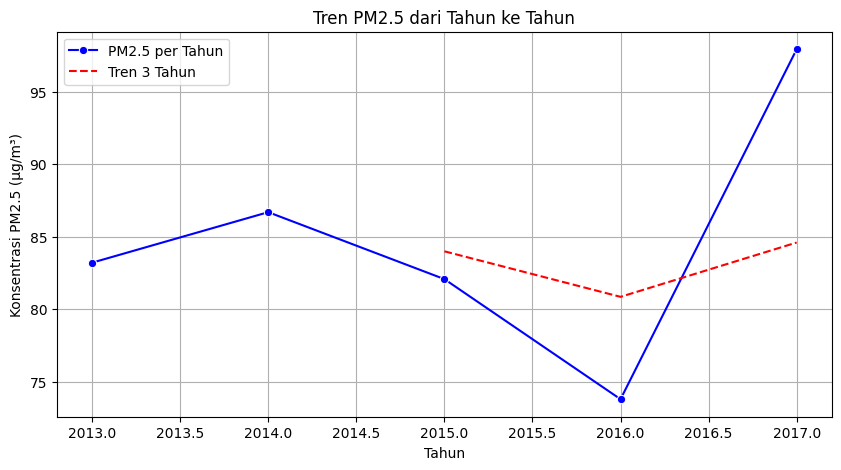

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung rata-rata tahunan PM2.5
df['year'] = df['datetime'].dt.year
pm25_yearly = df.groupby('year')['PM2.5'].mean()

# Buat plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=pm25_yearly.index, y=pm25_yearly.values, marker='o', label="PM2.5 per Tahun", color='blue')

# Tambahkan garis tren (moving average 3 tahun)
pm25_yearly_smooth = pm25_yearly.rolling(window=3).mean()
sns.lineplot(x=pm25_yearly.index, y=pm25_yearly_smooth, linestyle='dashed', label="Tren 3 Tahun", color='red')

# Tambahkan label
plt.title("Tren PM2.5 dari Tahun ke Tahun")
plt.xlabel("Tahun")
plt.ylabel("Konsentrasi PM2.5 (µg/m³)")
plt.legend()
plt.grid(True)

plt.show()


**Perbedaan Kualitas Udara Berdasarkan Musim Menggunakan Box Plot**

Tambahk:an informasi musim (winter, spring, summer, autumn).

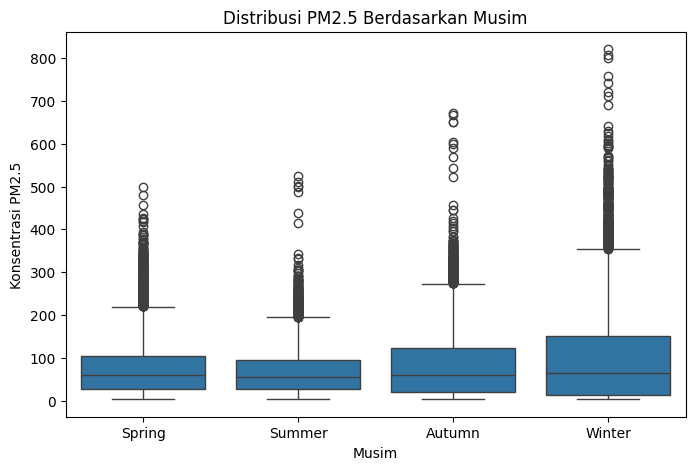

In [ ]:
# Tambahkan kolom musim
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['datetime'].dt.month.apply(get_season)

# Visualisasi boxplot kualitas udara berdasarkan musim
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='season', y='PM2.5', data=df)
plt.xlabel("Musim")
plt.ylabel("Konsentrasi PM2.5")
plt.title("Distribusi PM2.5 Berdasarkan Musim")
plt.show()


**Temuan**
1. Polusi udara cenderung lebih tinggi saat musim Winter.
2. Musim Summer memiliki tingkat polusi lebih rendah.
